In [77]:
from datetime import datetime as dt
from pathlib import Path
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

LOG_DIR = "/home/engineer/fltk-testbed/logging"
EXP_NAME = "exp_8"
CREATE_LOG = f"{LOG_DIR}/{EXP_NAME}/create.log"
START_LOG = f"{LOG_DIR}/{EXP_NAME}/start.log"
STOP_LOG = f"{LOG_DIR}/{EXP_NAME}/stop.log"

In [78]:
logs = [CREATE_LOG, START_LOG, STOP_LOG]
containers = defaultdict(dict)

for log in logs:
    with open(log, "r") as f:
        while line := f.readline():
            split = line.rstrip().split()
            key = Path(log).stem
            value = dt.strptime(f"{split[0]} {split[1]}", "%d-%m-%Y %H:%M:%S")
            containers[split[2]] |= {key: value}

In [79]:
for c in containers:
    container = containers[c]
    assert container["create"] < container["start"], f"{c} created after started"
    assert container["start"] < container["stop"], f"{c} started after stopped"
    container["queue"] = (container["start"] - container["create"]).total_seconds()
    container["service"] = (container["stop"] - container["start"]).total_seconds()
    container["response"] = (container["stop"] - container["create"]).total_seconds()

In [80]:
DURATION = 2000
LAMBDA = 1

queues = []
services = []
responses = []

for c in containers:
    container = containers[c]
    queues.append(container["queue"] / 60)
    services.append(container["service"] / 60)
    responses.append(container["response"] / 60)

mean_service = np.mean(services)
std_service = np.std(services)


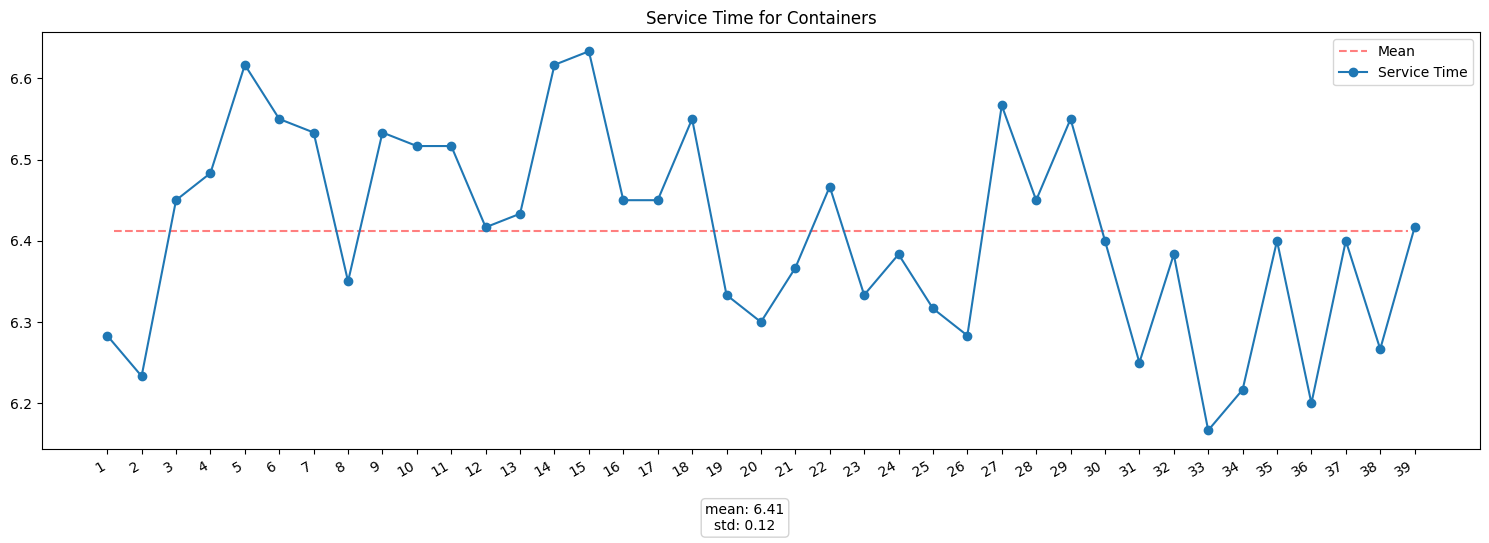

In [123]:
fig, ax = plt.subplots(figsize=(15, 5), tight_layout=True)
ax.axhline(
    mean_service,
    xmin=0.05,
    xmax=0.95,
    linestyle="--",
    color="r",
    alpha=0.5,
    label="Mean",
)
x = range(1, len(containers) + 1)
ax.plot(x, services, "-o", label="Service Time")
ax.legend()
ax.set_xticks(x)
ax.set_title("Service Time for Containers")
fig.text(
    0.5,
    -0.07,
    f"mean: {mean_service.round(2)}\nstd: {std_service.round(2)}",
    ha="center",
    bbox=dict(facecolor="none", edgecolor="lightgray", boxstyle="round"),
)
fig.autofmt_xdate()

In [82]:

print(mean_service)
print(std_service)

6.411965811965812
0.12165459007788718
